In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('...../Iris/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All of the numerical values have the scale(centimeters) and similar ranges between 0 and 8 centimeters.

# Data Visualization

# Univariate Plots

Box and whisker plots of each

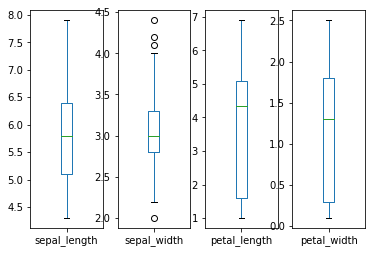

In [5]:
from pylab import *
rcParams['figure.figsize'] = 6,4
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

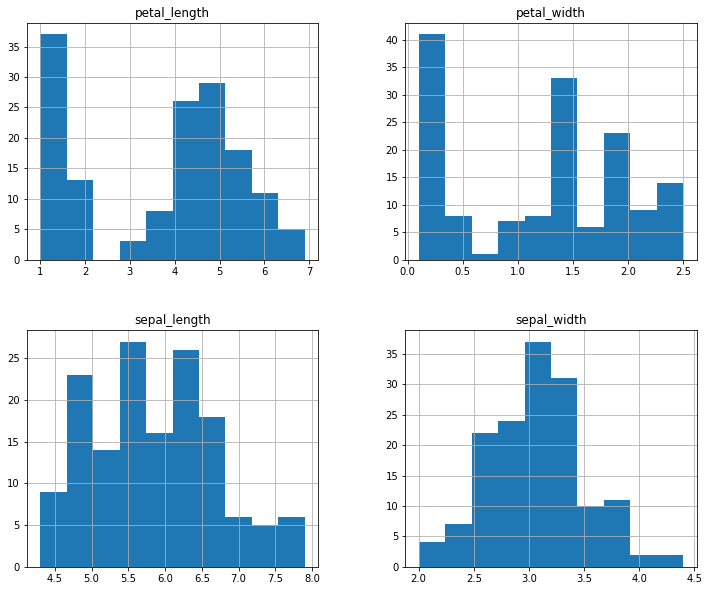

In [6]:
# histograms
from pylab import *
rcParams['figure.figsize'] = 12,10
df.hist()
plt.show()

# Multivariate Plots
Let's check at the interactions between the variables by plotting scatter plots of all pairs  

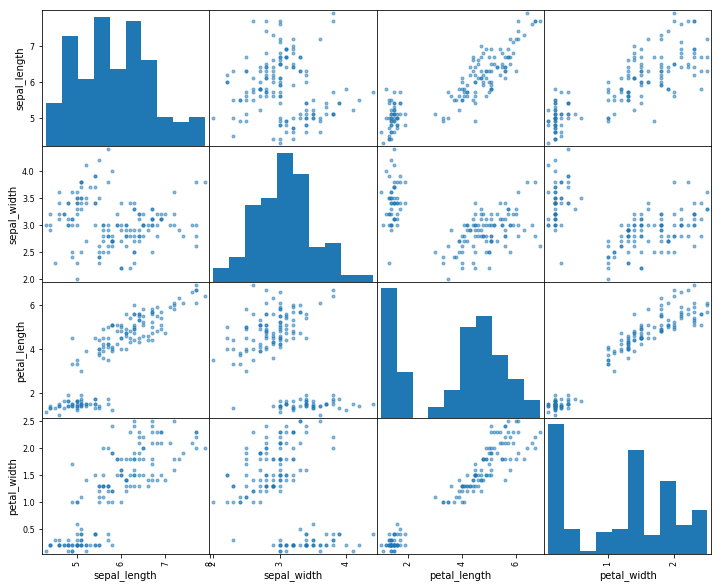

In [7]:
# scatter plot matrix
from pandas.tools.plotting import scatter_matrix
from pylab import *
rcParams['figure.figsize'] = 12,10
scatter_matrix(df)
plt.show()

Diagonal grouping of some pairs of attributes suggests a high correlation and a predictable relationship.

In [8]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

Given a seed, it will generate numbers with an equal distribution. 
But with the same seed, it will generate the same number sequence every time. 

In [9]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


KNN has the largest estimated accuracy score compared to other algorithms

Create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 

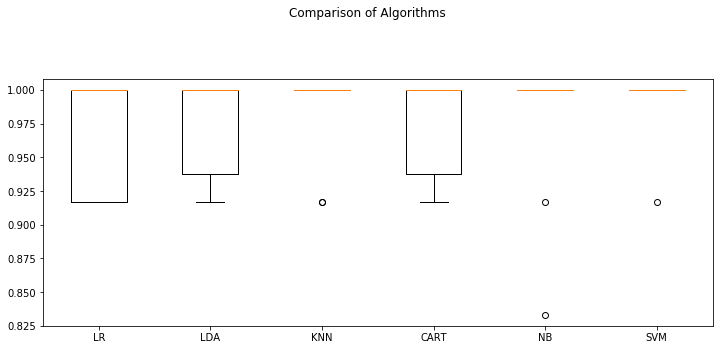

In [10]:
# Compare Algorithms
fig = plt.figure()
ax = fig.add_subplot(211)
fig.suptitle('Comparison of Algorithms')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In the above box and whisker plots, plots are squashed at the top of the range, with many samples achieving 100% accuracy.

Let's check accuracy of the model on our validation dataset. 
Run the KNN model on the validation set and summarize the results as a final accuracy score, 
a confusion matrix and a classification report.

In [11]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



Accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. 
Finally the classification report provides a breakdown of each class by precision.
F1-score shows excellent results.